<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
                              beer_servings  wine_servings  spirit_servings  \
beer_servings                      1.000000       0.527172         0.458819   
wine_servings                      0.527172       1.000000         0.194797   
spirit_servings                    0.458819       0.194797         1.000000   
total_litres_of_pure_alcohol       0.8358

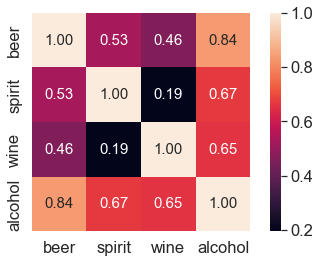

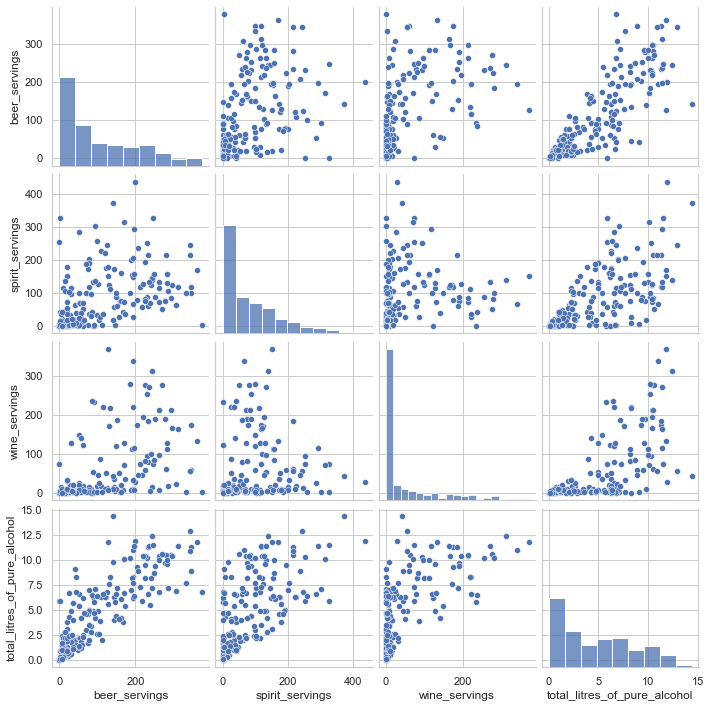

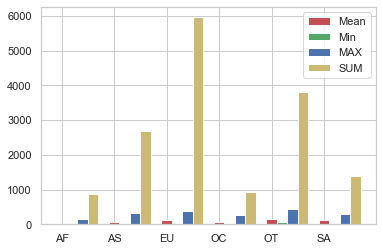

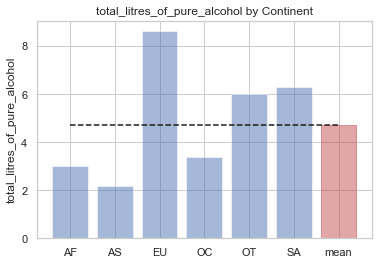

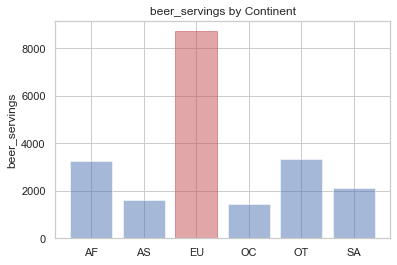

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head
drinks.describe() #수치형 피처의 요약 통계
corr = drinks[['beer_servings','wine_servings','spirit_servings','total_litres_of_pure_alcohol']].corr(method= 'pearson')
print(corr)
drinks.corr(method='pearson')
import seaborn as sns

cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar = True, # 히트맵 바 출력 여부
                 annot = True, # 상관 계수 출력 여부
                 square = True, # 사각형 형태
                 fmt = '.2f', # 포매팅
                 annot_kws = {'size':15},
                 yticklabels = cols_view,
                 xticklabels = cols_view
                 )
plt.tight_layout()
plt.show()

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean
n_groups= len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.2

rects1 = plt.bar(index, means, bar_width, color='r',label='Mean')
rects2 = plt.bar(index+bar_width,mins,bar_width,color = 'g', label = 'Min')
rects3 = plt.bar(index+bar_width*2,maxs,bar_width,color = 'b', label = 'MAX')
rects4 = plt.bar(index+bar_width*3,sums,bar_width,color = 'y', label = 'SUM')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6],[total_mean,total_mean],"k--")
plt.xticks(x_pos,continents)
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos,continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

# <Step 4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기
### 아프리카와 유럽간의 맥주 소비량 차이 검정하기

In [7]:
africa = drinks.loc[drinks['continent'] == 'AF']

In [8]:
europe = drinks.loc[drinks['continent']=='EU']

- `DataFrame.loc()` : 인덱스를 기준으로 행 데이터 추출

In [12]:
from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'],equal_var=False)

print("The t-statistic and p-vlaue assuming equal is %.3f and %.3f"%tTestResult)
print("The t-statistic and p-vlaue assuming equal is %.3f and %.3f"%tTestResultDiffVar)

The t-statistic and p-vlaue assuming equal is -7.268 and 0.000
The t-statistic and p-vlaue assuming equal is -7.144 and 0.000


### 한국은 얼마나 술을 독하게 마시는 나라일까?

In [15]:
# total servings 피쳐 생성
drinks['total_servings'] = drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
drinks['total_servings']

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: total_servings, Length: 193, dtype: int64

In [16]:
#술 소비량 대비 알코올 비율 피쳐 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks['alcohol_rate']

0      0.000000
1      0.017818
2      0.017949
3      0.017842
4      0.018495
         ...   
188    0.017661
189    0.017544
190    0.016667
191    0.045455
192    0.054651
Name: alcohol_rate, Length: 193, dtype: float64

In [17]:
#순위 정보 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


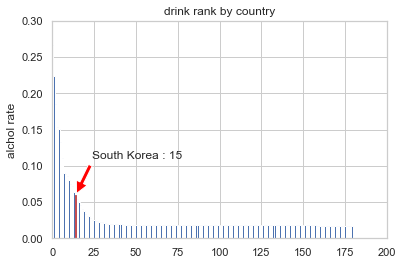

In [22]:
country_list = country_with_rank.country.tolist() # 숭위 정보 중 country 피쳐로 리스트 생성
x_pos = np.arange(len(country_list)) # x축 값
rank = country_with_rank.alcohol_rate.tolist() # 그래프 값, 순위 정보 중 alcohol_rate 피처로 리스트 생성

bar_list = plt.bar(x_pos,rank) # x축 값, 그래프 갑승로 막대 그래프 생성
bar_list[country_list.index("South Korea")].set_color('r') # 한국 그래프에 red 색상 적용
plt.ylabel('alchol rate')
plt.title('drink rank by country')
plt.axis([0,200,0,0.3]) # x,y축에 대한 옵션을 다루는 메소드

korea_rank = country_list.index("South Korea")
#한국의 알콜 소비량 추출, 나라별 수누이 데이터프레임에서 나라가 한국인 것의 alcohol_rate값만 추출
#시리즈에서 값을 추출하면 시리즈가 되기 때문에 하나만 추출 valrues[0]
#화살표와 화살표 텍스트 스타일 지정
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate("South Korea : " + str(korea_rank +1), #텍스트 값
             xy = (korea_rank,korea_alc_rate), #화살표 머리 표시할 x,y 위치
             xytext = (korea_rank +10, korea_alc_rate+0.05), #화살표 텍스트를 표시할 x,y위치
             arrowprops = dict(facecolor = 'red', shrink=0.05)) #화살표 색상
plt.show()